1. Import Global Libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()

2. Load dataset, randomize it and dispaly the first 5 rows

In [39]:
df = pd.read_csv("tech_test_data.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,message,case_type,conversation_id,message_id,message_number,message_source
0,"Hi, I have an order due to arrive today and no...",order_status,16,67,1,customer
1,Thank you! Please wait a minute while I check ...,order_status,15,66,6,agent
2,Of course! Let me assist. Please share your ac...,order_status,12,49,2,agent
3,"account number is 72934923, and order id is 98...",cancel_order,6,26,3,customer
4,"Hi, thanks for helping out – I want to cancel ...",cancel_order,5,18,1,customer


3. Remove all empty messages if any

In [40]:
df = df[~df['message'].isnull()]
df.head(5)

,message,case_type,conversation_id,message_id,message_number,message_source
0,"Hi, I have an order due to arrive today and no...",order_status,16,67,1,customer
1,Thank you! Please wait a minute while I check ...,order_status,15,66,6,agent
2,Of course! Let me assist. Please share your ac...,order_status,12,49,2,agent
3,"account number is 72934923, and order id is 98...",cancel_order,6,26,3,customer
4,"Hi, thanks for helping out – I want to cancel ...",cancel_order,5,18,1,customer


In [41]:
df['message_length'] = df['message'].astype(str).apply(len)
df['message_words'] = df['message'].apply(lambda x: len(str(x).split()))

In [42]:
df.head(5)

,message,case_type,conversation_id,message_id,message_number,message_source,message_length,message_words
0,"Hi, I have an order due to arrive today and no...",order_status,16,67,1,customer,102,23
1,Thank you! Please wait a minute while I check ...,order_status,15,66,6,agent,64,12
2,Of course! Let me assist. Please share your ac...,order_status,12,49,2,agent,103,20
3,"account number is 72934923, and order id is 98...",cancel_order,6,26,3,customer,52,9
4,"Hi, thanks for helping out – I want to cancel ...",cancel_order,5,18,1,customer,54,12


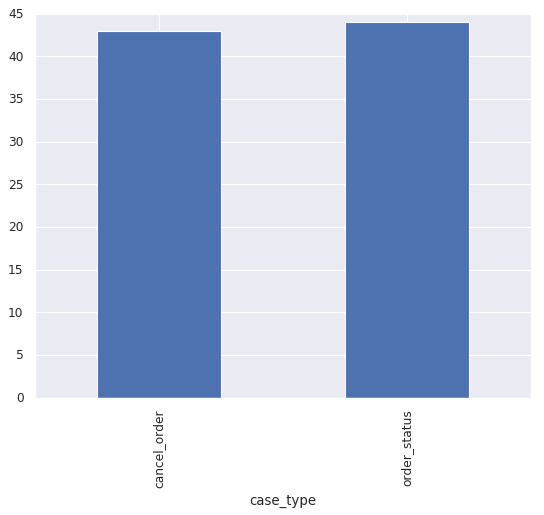

In [108]:
df.groupby('case_type').message.count().plot.bar(ylim=0)

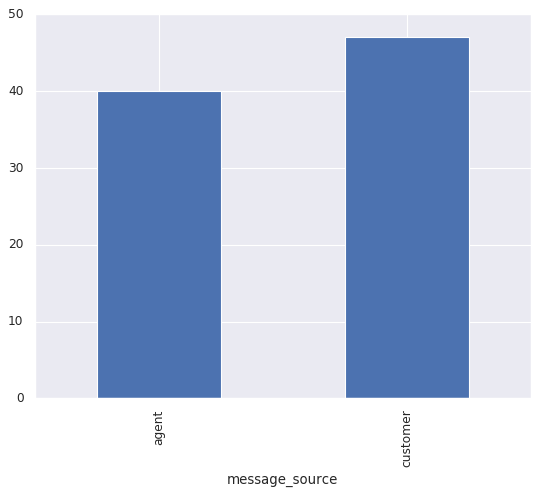

In [110]:
df.groupby('message_source').message.count().plot.bar(ylim=0)

(array([0.01359535, 0.00494376, 0.01483129, 0.00617971, 0.021011  ,
        0.00247188, 0.01483129, 0.00247188, 0.        , 0.02719071]),
 array([ 18. ,  27.3,  36.6,  45.9,  55.2,  64.5,  73.8,  83.1,  92.4,
        101.7, 111. ]),
 <a list of 10 Patch objects>)

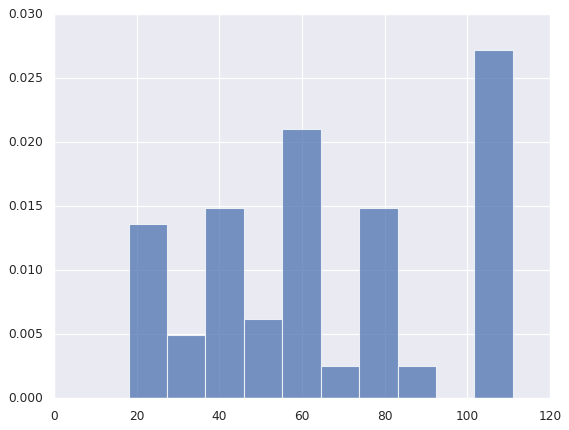

In [70]:
plt.hist(df.message_length, density=True, alpha=0.75)

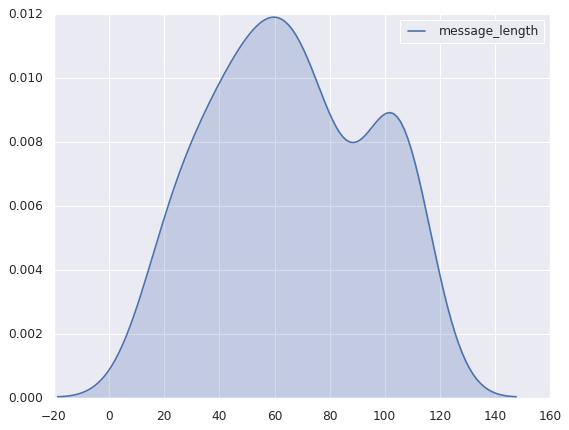

In [71]:
sns.kdeplot(df.message_length, shade=True)

(array([0.04597701, 0.04597701, 0.05747126, 0.04022989, 0.0862069 ,
        0.07471264, 0.01149425, 0.01149425, 0.11494253, 0.01149425]),
 array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.]),
 <a list of 10 Patch objects>)

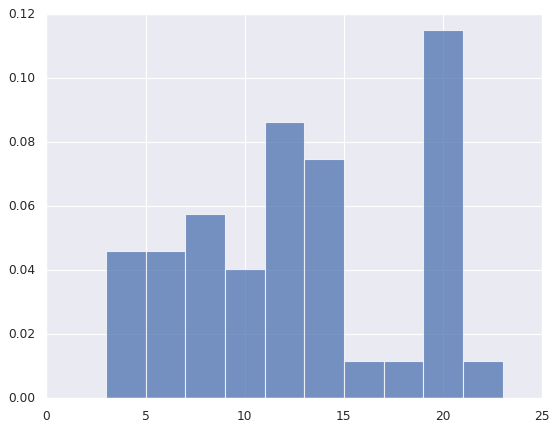

In [72]:
plt.hist(df.message_words, density=True, alpha=0.75)

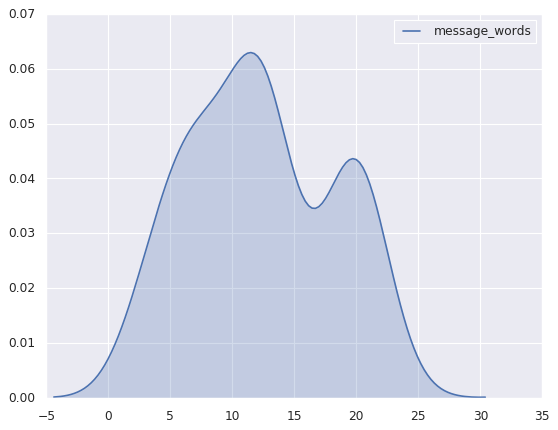

In [73]:
sns.kdeplot(df.message_words, shade=True)

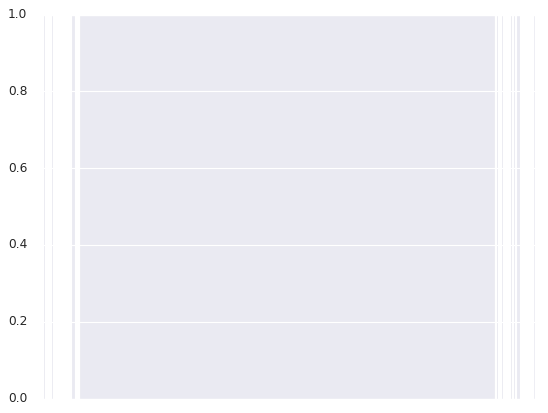

In [74]:
df.message_source.hist()

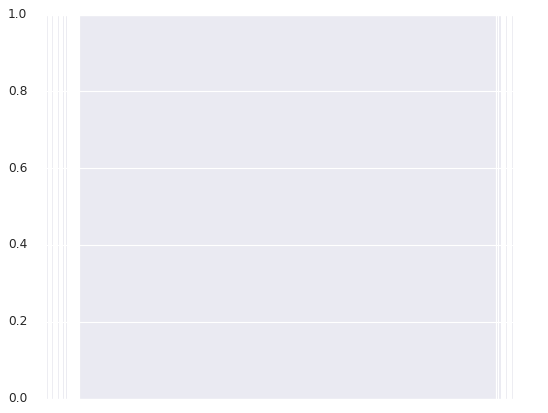

In [75]:
df.case_type.hist()

([array([0.        , 0.00851426, 0.0063857 , 0.01383567, 0.00744998,
         0.01596424, 0.01383567, 0.00212857, 0.00106428, 0.02341422]),
  array([0.06492124, 0.02767135, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ])],
 array([  3. ,  13.8,  24.6,  35.4,  46.2,  57. ,  67.8,  78.6,  89.4,
        100.2, 111. ]),
 <a list of 2 Lists of Patches objects>)

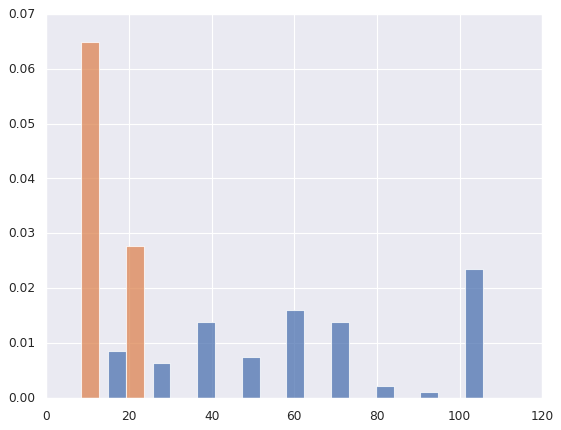

In [76]:
plt.hist([df.message_length, df.message_words], density=True, alpha=0.75)

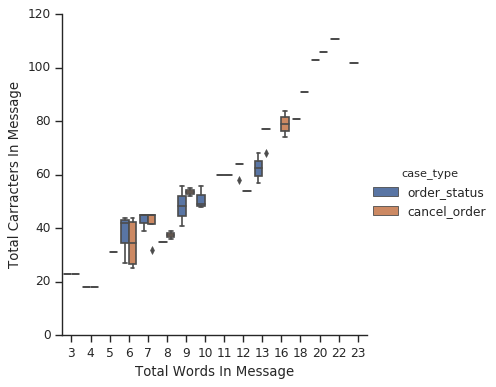

In [86]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("message_words", "message_length", "case_type", data=df, kind="box")
    g.set_axis_labels("Total Words In Message", "Total Carracters In Message");

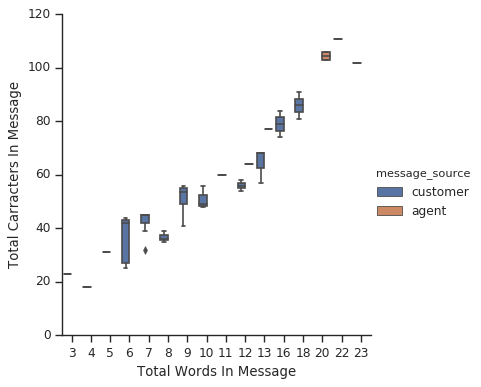

In [87]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("message_words", "message_length", "message_source", data=df, kind="box")
    g.set_axis_labels("Total Words In Message", "Total Carracters In Message");

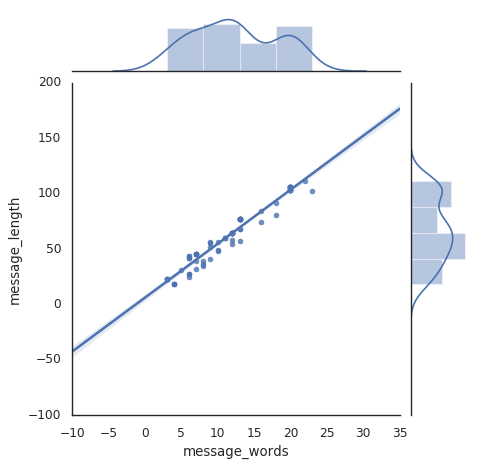

In [93]:
with sns.axes_style('white'):
    sns.jointplot("message_words", "message_length", data=df, kind='reg')

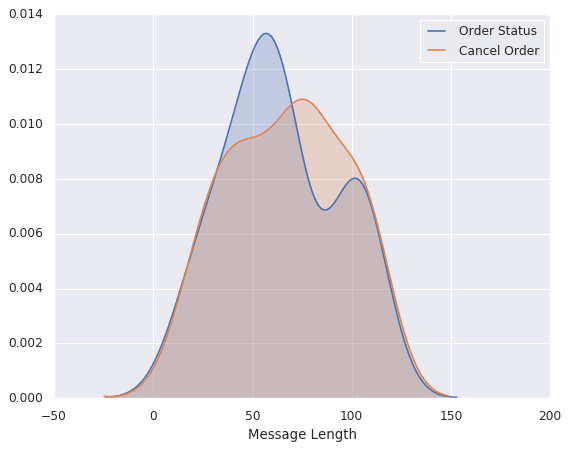

In [101]:
sns.kdeplot(df[df.case_type=='order_status'].message_length, label='Order Status', shade=True)
sns.kdeplot(df[df.case_type=='cancel_order'].message_length, label='Cancel Order', shade=True)
plt.xlabel('Message Length');

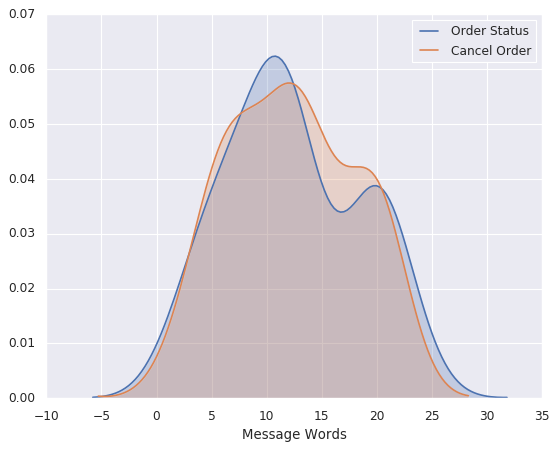

In [103]:
sns.kdeplot(df[df.case_type=='order_status'].message_words, label='Order Status', shade=True)
sns.kdeplot(df[df.case_type=='cancel_order'].message_words, label='Cancel Order', shade=True)
plt.xlabel('Message Words');

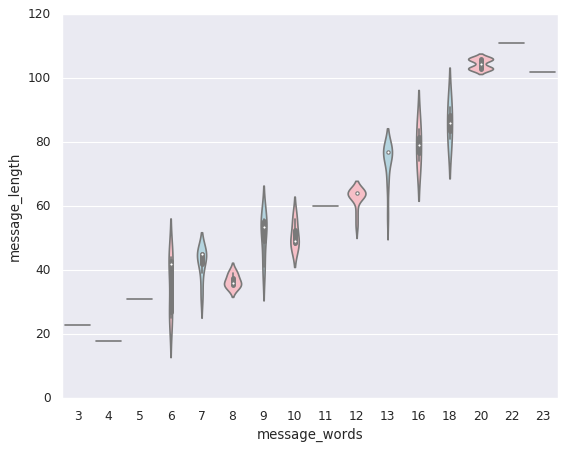

In [106]:
sns.violinplot("message_words", "message_length", data=df,
               palette=["lightblue", "lightpink"]);